In [1]:
import os
import sys

#  Set the working directory to the folder containing the top-level ultralytics package
os.chdir("/workspace")  # change to your workspace root where ultralytics folder exists
print("Current working directory:", os.getcwd())


Current working directory: /workspace


In [2]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics


fatal: destination path 'ultralytics' already exists and is not an empty directory.
/workspace/ultralytics


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import sys

#  Set the working directory to the folder containing the top-level ultralytics package
print("Current working directory:", os.getcwd())


Current working directory: /workspace


In [3]:
#  Add the top-level ultralytics folder to Python path
os.chdir("/workspace/ultralytics")
print("Current working directory:", os.getcwd())

Current working directory: /workspace/ultralytics


In [4]:
from ultralytics import YOLO

# This will download yolov8l.pt automatically if not present
model = YOLO("yolov8l.pt")


In [5]:
from ultralytics import YOLO

# -------------------------------
# Load YAML (with original SPPF)
# -------------------------------
model = YOLO('yolov8.yaml')
print("Original model loaded ")


WARNING ⚠️ no model scale passed. Assuming scale='l'.
Original model loaded 


In [6]:
import ultralytics
print(ultralytics.__file__)


/workspace/ultralytics/ultralytics/__init__.py


In [7]:
from ultralytics.models.yolo.model import YOLO

# Load your YOLOv8 model (with CBAM if added)
model = YOLO("ultralytics/cfg/models/v8/yolov8.yaml")

# Print the full architecture
print(model.model)   # model.model contains the actual PyTorch nn.Module


WARNING ⚠️ no model scale passed. Assuming scale='l'.
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runn

In [8]:
print("Current working directory:", os.getcwd())


Current working directory: /workspace/ultralytics


In [9]:
from ultralytics.nn import tasks
from ultralytics.models.yolo.model import YOLO

model = YOLO("ultralytics/cfg/models/v8/yolov8.yaml")
model.info()


WARNING ⚠️ no model scale passed. Assuming scale='l'.
YOLOv8 summary: 209 layers, 43,635,237 parameters, 43,635,221 gradients


(209, 43635237, 43635221, 0.0)

In [10]:
from ultralytics import YOLO
import time
import torch

# === Parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"
run_name = "yolov8l_base_hyperspat40"
epochs = 2                # max epochs; early stopping may stop earlier
imgsz = 1280              # research-level resolution
batch_size = 32           # adjust according to VRAM
workers = 2               # safer for shared memory
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cache_images = "disk"
amp = True                # mixed precision
save_interval = 50         # save checkpoint every 2 epochs
patience = 40             # early stopping patience

# === Initialize YOLOv8n ===
model = YOLO("yolov8l.pt")  # pre-trained weights


# === Start training ===
start_time = time.time()
print(f"Starting training for {epochs} epochs...\n")

results = model.train(
    data=dataset_yaml,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    workers=workers,
    device=device,
    cache=cache_images,
    name=run_name,
    save=True,
    amp=amp,
    patience=patience,
    save_period=save_interval,
    optimizer="AdamW",
    lr0=0.001,
    weight_decay=1e-4,
    cos_lr=True,
    lrf=0.01,
    augment=True
)

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/3600:.2f} hours")


Starting training for 2 epochs...

New https://pypi.org/project/ultralytics/8.3.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.200 🚀 Python-3.10.12 torch-2.4.0a0+f70bd71a48.nv24.06 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/workspace/datasets/KITTI/kitti.yml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=

In [ ]:
from ultralytics import YOLO
import time
import torch

# === Parameters ===
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"
run_name = "yolov8l_base_hyperspat40"
epochs = 250                # max epochs; early stopping may stop earlier
imgsz = 1280              # research-level resolution
batch_size = 32           # adjust according to VRAM
workers = 2               # safer for shared memory
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cache_images = "disk"
amp = True                # mixed precision
save_interval = 50         # save checkpoint every 2 epochs
patience = 40             # early stopping patience

# === Initialize YOLOv8n ===
model = YOLO("yolov8l.pt")  # pre-trained weights


# === Start training ===
start_time = time.time()
print(f"Starting training for {epochs} epochs...\n")

results = model.train(
    data=dataset_yaml,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    workers=workers,
    device=device,
    cache=cache_images,
    name=run_name,
    save=True,
    amp=amp,
    patience=patience,
    save_period=save_interval,
    optimizer="AdamW",
    lr0=0.001,
    weight_decay=1e-4,
    cos_lr=True,
    lrf=0.01,
    augment=True
)

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/3600:.2f} hours")


Starting training for 250 epochs...

New https://pypi.org/project/ultralytics/8.3.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.200 🚀 Python-3.10.12 torch-2.4.0a0+f70bd71a48.nv24.06 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/workspace/datasets/KITTI/kitti.yml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mos

In [12]:
import sys
from pathlib import Path
import torch
import time
from ultralytics import YOLO  # Use YOLOv8's interface

weights = "runs/detect/yolov8l_base_hyperspat40/weights/best.pt"
dataset_yaml = "/workspace/datasets/KITTI/kitti.yml"
results_dir = "/workspace/yolov8l_base_hyperspat40_val"

# ------------------- Device -------------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# ------------------- Load model -------------------
model = YOLO(weights)  # Load the model using YOLOv8
params = sum(p.numel() for p in model.model.parameters())
params_mb = params * 4 / (1024**2)  # float32 -> 4 bytes
model_size_mb = Path(weights).stat().st_size / 1024**2  # file size in MB

print(f"Model size (file): {model_size_mb:.2f} MB")
print(f"Model parameters: {params_mb:.2f} MB")

# ------------------- FPS Measurement -------------------
dummy_input = torch.randn(1, 3, 1280, 1280).to(device) / 255.0  # Normalize the dummy input
# Warm-up
for _ in range(5):
    _ = model(dummy_input)  # Use the model directly for inference

n_runs = 50
start_time = time.time()
for _ in range(n_runs):
    _ = model(dummy_input)  # Use the model directly for inference
end_time = time.time()

fps = n_runs / (end_time - start_time)
print(f"Inference FPS (1280x1280): {fps:.2f}")

# ------------------- Run Validation -------------------
print("\nRunning YOLOv8 validation...")
start_val_time = time.time()
model.val(
    data=dataset_yaml,  # Validation dataset
    imgsz=1280,          # Image size
    batch=64,            # Corrected batch size argument
    device=device,       # Device
    project=results_dir, # Results directory
    name="eval_metrics", # Name for saved results
    save_json=True,      # Save results as JSON
    exist_ok=True,       # Overwrite if results directory exists
    verbose=True         # Show verbose output
)
end_val_time = time.time()

val_time = end_val_time - start_val_time
print(f"Validation time: {val_time:.2f} seconds")
print(f"Validation results saved to {results_dir}")


Model size (file): 83.63 MB
Model parameters: 166.46 MB

0: 1280x1280 (no detections), 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.8ms
Speed: 0.0ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 14.6ms
Speed: 0.0ms preprocess, 14.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 13.3ms
Speed: 0.0ms preprocess, 13.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 13.2ms
Speed: 0.0ms preprocess, 13.2ms inference, 1.1ms postprocess per image at shape (1, 

In [17]:
import numpy as np
import pandas as pd

# -----------------------------
# CONFIGURATION
# -----------------------------
class_names = ["Car", "Van", "Truck", "Pedestrian", "Person_sitting", "Cyclist", "Tram"]
num_classes = len(class_names)

# -----------------------------
# CONFUSION MATRIX (predicted rows x true cols)
# -----------------------------
conf_matrix = np.array([
    [5554, 6, 0, 0, 0, 0, 0, 283],
    [4, 541, 1, 0, 0, 0, 0, 32],
    [0, 1, 190, 0, 0, 0, 0, 9],
    [0, 0, 0, 820, 0, 4, 0, 155],
    [0, 0, 0, 0, 25, 0, 0, 9],
    [0, 0, 0, 1, 0, 283, 0, 34],
    [0, 0, 0, 0, 0, 0, 95, 7],
    [122, 15, 7, 75, 5, 19, 4, 0]
])

# -----------------------------
# PER-CLASS LOG
# -----------------------------
per_class_precision = [0.968, 0.966, 0.981, 0.948, 0.778, 0.949, 0.954]  
per_class_recall =    [0.963, 0.946, 0.919, 0.859, 0.733, 0.908, 0.929]  
per_class_map50 = [0.985, 0.98, 0.982, 0.93, 0.764, 0.952, 0.956]
per_class_map5095 = [0.918, 0.914, 0.924, 0.622, 0.623, 0.815, 0.884]

# -----------------------------
# COMPUTE METRICS
# -----------------------------
metrics_data = []
total_samples = np.sum(conf_matrix)

for i, cname in enumerate(class_names):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[i, :]) - TP
    FN = np.sum(conf_matrix[:, i]) - TP
    TN = total_samples - (TP + FP + FN)

    #Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    #Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = per_class_precision[i] 
    Recall = per_class_recall[i]        
    F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) > 0 else 0
    Accuracy = (TP + TN) / total_samples if total_samples > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

    metrics_data.append({
        "Class": cname,
        "TP": int(TP),
        "FP": int(FP),
        "FN": int(FN),
        "TN": int(TN),
        "Precision": round(per_class_precision[i], 4),
        "Recall": round(per_class_recall[i], 4),
        "F1 Score": round(F1, 4),
        "Accuracy": round(Accuracy, 4),
        "FPR": round(FPR, 4),
        "FNR": round(FNR, 4),
        "mAP@0.5": per_class_map50[i],
        "mAP@0.5:0.95": per_class_map5095[i]
    })

# -----------------------------
# OVERALL ROW
# -----------------------------
TP_total = sum(row["TP"] for row in metrics_data)
FP_total = sum(row["FP"] for row in metrics_data)
FN_total = sum(row["FN"] for row in metrics_data)
TN_total = sum(row["TN"] for row in metrics_data)

overall = {
    "Class": "Overall",
    "TP": TP_total,
    "FP": FP_total,
    "FN": FN_total,
    "TN": TN_total,
    "Precision": np.mean([row["Precision"] for row in metrics_data]),
    "Recall": np.mean([row["Recall"] for row in metrics_data]),
    "F1 Score": np.mean([row["F1 Score"] for row in metrics_data]),
    "Accuracy": np.mean([row["Accuracy"] for row in metrics_data]),
    "FPR": np.mean([row["FPR"] for row in metrics_data]),
    "FNR": np.mean([row["FNR"] for row in metrics_data]),
    "mAP@0.5": np.mean([row["mAP@0.5"] for row in metrics_data]),
    "mAP@0.5:0.95": np.mean([row["mAP@0.5:0.95"] for row in metrics_data])
}

metrics_data.append(overall)

# -----------------------------
# SAVE TO CSV
# -----------------------------
df_metrics = pd.DataFrame(metrics_data)
df_metrics.to_csv("yolov8l_base_hyperspat40_metrics.csv", index=False)
print(df_metrics)


            Class    TP   FP   FN     TN  Precision    Recall  F1 Score  \
0             Car  5554  289  126   2332   0.968000  0.963000  0.965500   
1             Van   541   37   22   7701   0.966000  0.946000  0.955900   
2           Truck   190   10    8   8093   0.981000  0.919000  0.949000   
3      Pedestrian   820  159   76   7246   0.948000  0.859000  0.901300   
4  Person_sitting    25    9    5   8262   0.778000  0.733000  0.754800   
5         Cyclist   283   35   23   7960   0.949000  0.908000  0.928000   
6            Tram    95    7    4   8195   0.954000  0.929000  0.941300   
7         Overall  7508  546  264  49789   0.934857  0.893857  0.913686   

   Accuracy     FPR       FNR   mAP@0.5  mAP@0.5:0.95  
0  0.950000  0.1103  0.022200  0.985000      0.918000  
1  0.992900  0.0048  0.039100  0.980000      0.914000  
2  0.997800  0.0012  0.040400  0.982000      0.924000  
3  0.971700  0.0215  0.084800  0.930000      0.622000  
4  0.998300  0.0011  0.166700  0.764000     


image 1/1 /workspace/000007.png: 416x1280 4 Cars, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 1280)


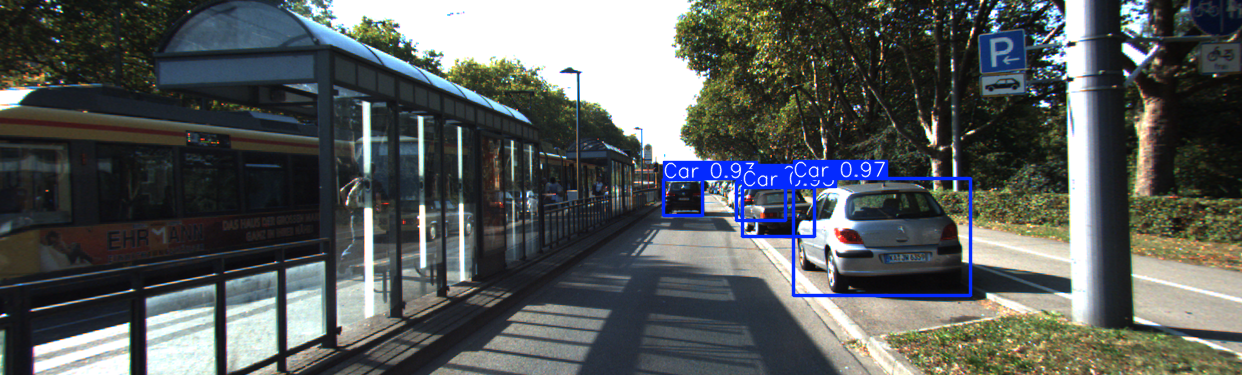

In [14]:
from ultralytics import YOLO

# Try loading and running inference with the trained model
model = YOLO("runs/detect/yolov8l_base_hyperspat40/weights/best.pt")  # path to your trained model
results = model.predict("/workspace/000007.png")  # use any sample image
results[0].show()


In [15]:
import shutil

# Specify the folder path and the destination zip file path
folder_path = 'runs/detect/yolov8l_base_hyperspat40'
zip_file_path = 'runs/detect/yolov8l_base_hyperspat40.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

'/workspace/ultralytics/runs/detect/yolov8l_base_hyperspat40.zip'

In [16]:
import shutil

# Specify the folder path and the destination zip file path
folder_path = '/workspace/yolov8l_base_hyperspat40_val'
zip_file_path = '/workspace/yolov8l_base_hyperspat40_val.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

'/workspace/yolov8l_base_hyperspat40_val.zip'